# Laboratory 4

| Name | Surname | ID Number |
|------|---------|---------------------|
| Andrea | Turci | 2106724 |

In [15]:
library(ggplot2)
library(bayestestR)
library(dplyr)
library(ggplot2)
library(geosphere)
library(spatstat)
library(Hmisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: spatstat.data

Loading required package: spatstat.geom

spatstat.geom 3.2-9


Attaching package: ‘spatstat.geom’


The following object is masked from ‘package:geosphere’:

    perimeter


Loading required package: spatstat.random

spatstat.random 3.2-3

Loading required package: spatstat.explore

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


spatstat.explore 3.2-7


Attaching package: ‘spatstat.explore’


The following object is masked from ‘package:bayestestR’:

    auc


Loading required package: spatstat.model

Loading required package: rpart

spatstat.model 3.2-11

Loading required package: spatstat.linnet

spatstat.linnet 3.1-5


spatstat 3.0-8 
For an introduction to spatst

## Exercise 1

- A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.
- A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.


a) What is the probability distribution of y, the number of times the new method fails to detect the disease ?


We are dealing with a Binomial distribution where $y$ is the variable:

$
P(y) = \binom{n}{y} p^y (1-p)^{n-y}
$

Making an example, with $n = 75$ and $p = 0.15$:

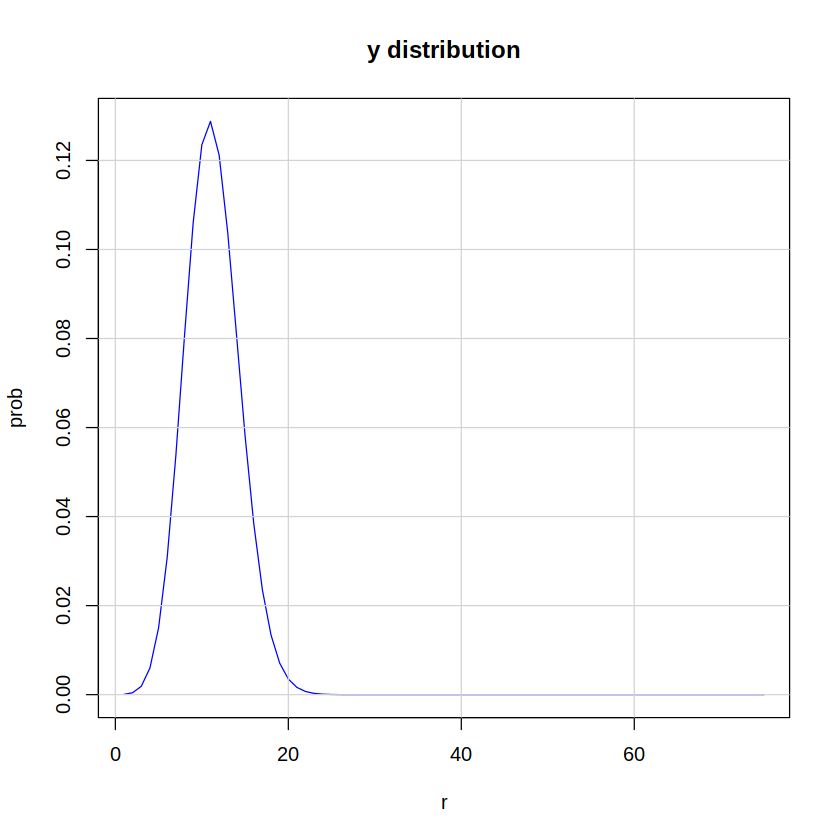

In [7]:
n <- 75
p <- 0.15

prob_binomial <- function(n, p) {
    y_values <- seq(1, n, 1)
    values <- c()
    for (y in y_values) {
        binom <- dbinom(x=y, size = n, prob = p)
        values <- append(values, binom)
    }
    return(values)
}

binom <- prob_binomial(n, p)

r <- seq(1, n, 1)

plot(r, binom, type = "l", col = "blue", xlab = "r", ylab = "prob", main = "y distribution")
grid(lty = 1)

b) On the $n = 75$ patients sample, the new method fails to detect the disease in $y = 6$ cases. What is the frequentist estimator of the failure probability of the new method ?


In [27]:
y <- 6
n <- 75

mean_freq <- 6/75
var_freq <- (p*(1-p))/n

c) Setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance

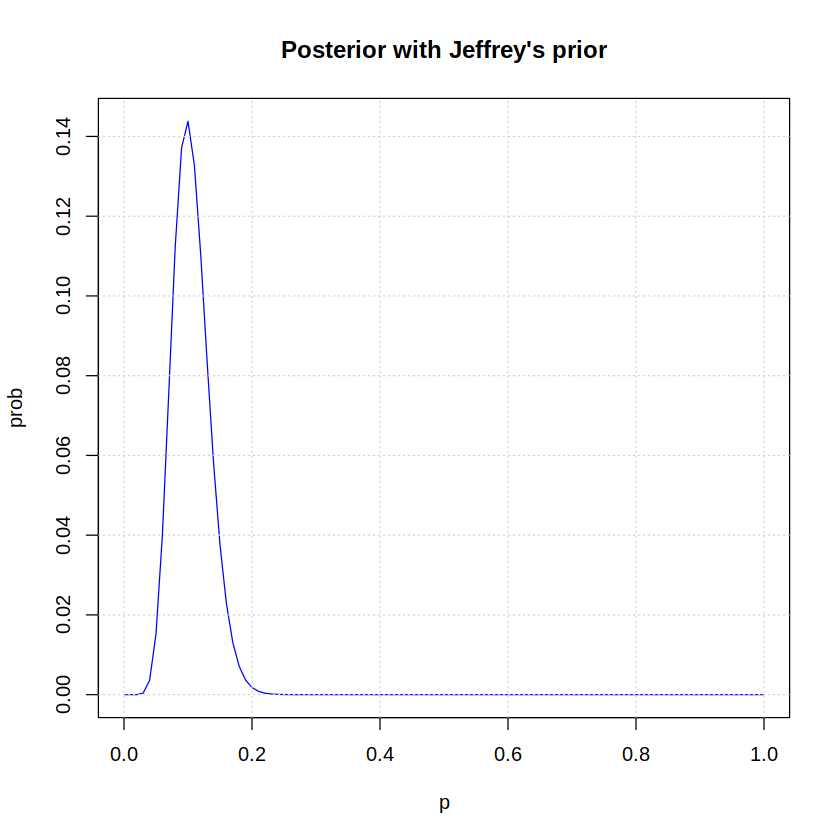

In [25]:
m <- 0.15
std <- 0.14

a <- ((1/m) - 1) * (m**2) / (std**2) - m
b <- a *((1/m) - 1)

a_prime <- a + y
b_prime <- b + n - y

p <- seq(0, 1, 0.01)
beta_post <- dbeta(p, a_prime, b_prime)

beta_post <- beta_post / sum(beta_post)

p_freq <- y/n

mean_bayes <- a_prime/(a_prime + b_prime)
variance_bayes <- (1/(n+2))**2 * n * p_freq * (1-p_freq)

plot(p, beta_post, type = "l", col = "blue", xlab = "p", ylab = "prob", main = "Posterior with Jeffrey's prior")
grid()